In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the csv file 
df = pd.read_csv(r'C:\Project_files\credit_risk_dataset.csv')

### Data analysis (EDA)

In [3]:
# removing the duplicates 
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [4]:
# removing the missing values
df.dropna(inplace=True)

<AxesSubplot:xlabel='loan_percent_income'>

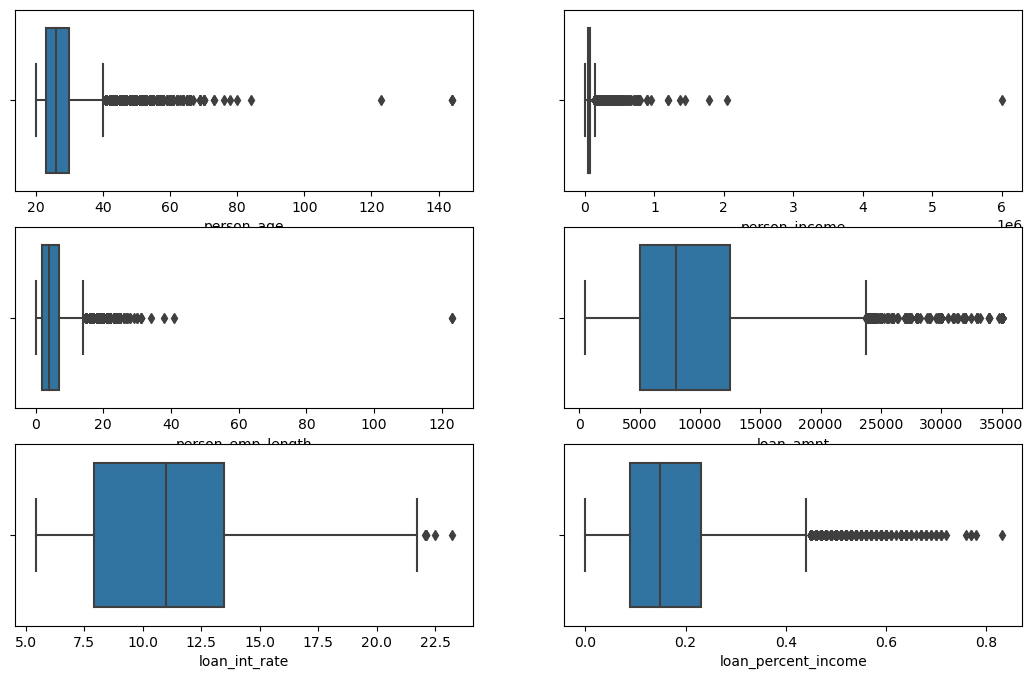

In [5]:
# finding out layers 
plt.figure(figsize=(13,8))
plt.subplot(321)
sns.boxplot(x = df.person_age)
plt.subplot(322)
sns.boxplot(x = df.person_income)
plt.subplot(323)
sns.boxplot(x = df.person_emp_length)
plt.subplot(324)
sns.boxplot(x = df.loan_amnt)
plt.subplot(325)
sns.boxplot(x = df.loan_int_rate)
plt.subplot(326)
sns.boxplot(x = df.loan_percent_income)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cb_person_cred_hist_length'>

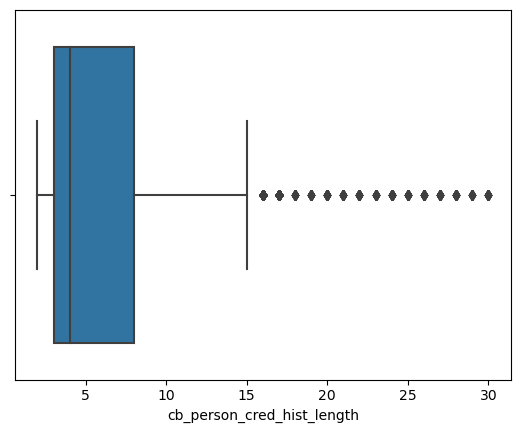

In [6]:
sns.boxplot(df.cb_person_cred_hist_length)

In [7]:
# droping the outlayers using 'zscore'

from scipy import stats
i = stats.zscore(df.person_age)
df = df[i.between(-3,3)]

i = stats.zscore(df.person_income)
df = df[i.between(-3,3)]

i = stats.zscore(df.person_emp_length)
df = df[i.between(-3,3)]

i = stats.zscore(df.loan_amnt)
df = df[i.between(-3,3)]

i = stats.zscore(df.loan_int_rate)
df = df[i.between(-3,3)]

i = stats.zscore(df.loan_percent_income)
df = df[i.between(-3,3)]

i = stats.zscore(df.cb_person_cred_hist_length)
df = df[i.between(-3,3)]

In [14]:
df.to_csv(r'C:\Project_files\credit_risk_dataset_cleaned.csv') 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_grade', ylabel='loan_int_rate'>

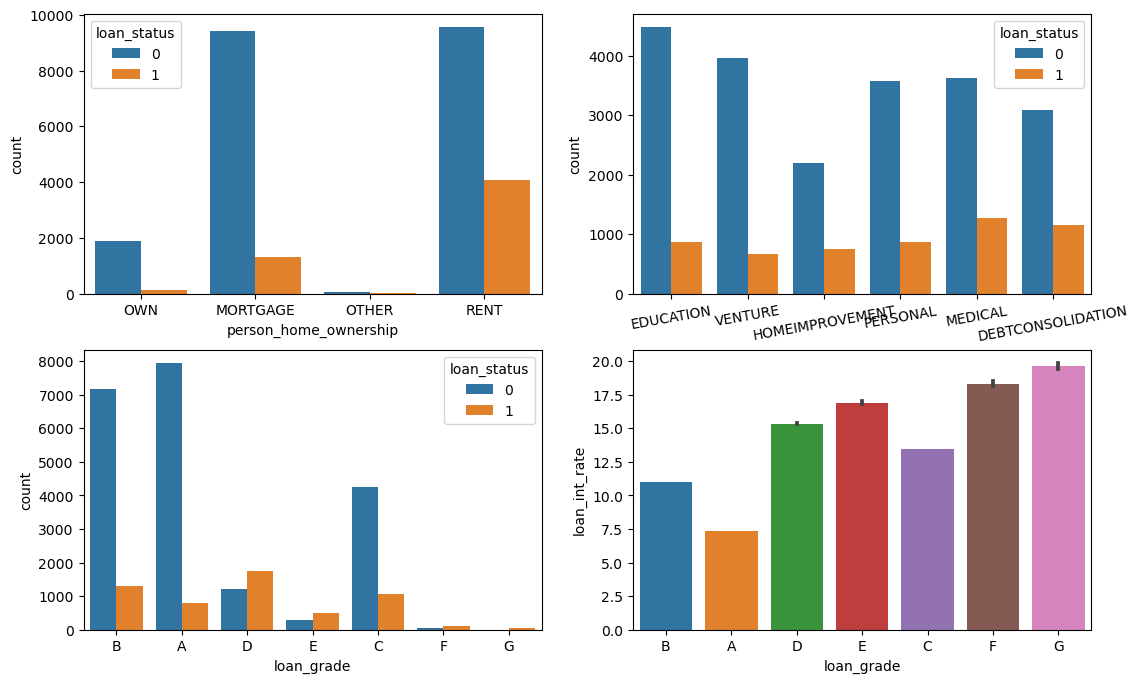

In [9]:
plt.figure(figsize=(13,8))
plt.subplot(221)
sns.countplot(df.person_home_ownership,hue= df.loan_status)
plt.subplot(222)
sns.countplot( df.loan_intent,hue= df.loan_status)
plt.xticks(rotation = 10)
plt.subplot(223)
sns.countplot(x = df.loan_grade,hue= df.loan_status)
plt.subplot(224)
sns.barplot(x = df.loan_grade,y = df.loan_int_rate,estimator=np.mean)


### Conclusion
    -The person who is having own house the loan defaulter are very less compared other owner ships,bur they are taking very less loan,but the rented houses are taking loan very high ,but the defulters are also high in rented house
    -the defaulters are high in medical loans ,the high loans are in education and venture as well as the defaulters are also less
    -the person in 'A' loan grade can get low intrust rate of course they are the best customers,

In [10]:
i = df.loan_intent.value_counts()

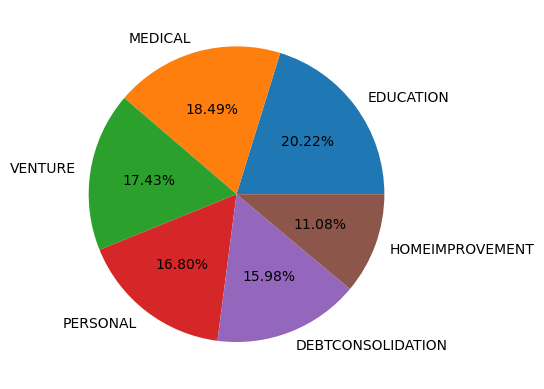

In [11]:
plt.pie(i.values,labels= i.index,autopct='%.2f%%')
plt.show();

C:\Users\HP\AppData\Local\Temp\ipykernel_4912\1537501526.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),fmt='.2f',annot=True)


<AxesSubplot:>

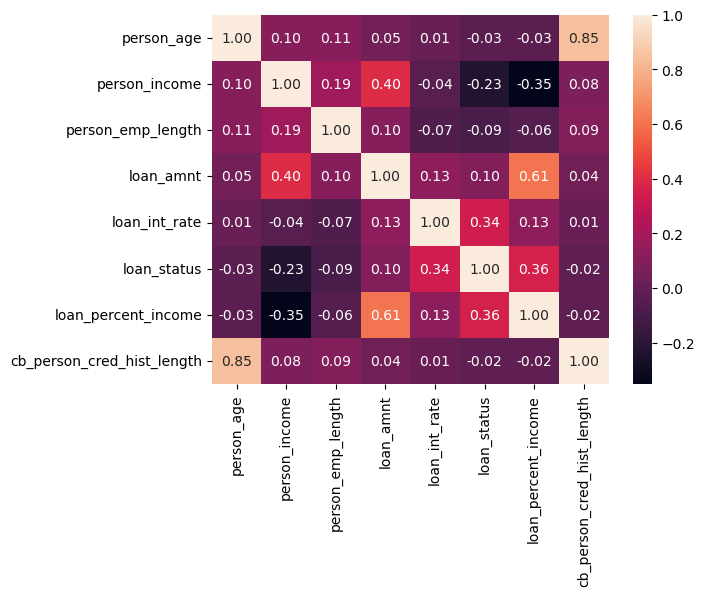

In [12]:
sns.heatmap(df.corr(),fmt='.2f',annot=True)

In [13]:
# the target variable (output) is loan_status
# segrigating the input and output
X = df[['person_age','person_income','person_home_ownership','person_emp_length','loan_intent','loan_grade',
    'loan_amnt','loan_int_rate','loan_percent_income','cb_person_default_on_file']]
y = df['loan_status']

In [15]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=10)

In [16]:
# segrigating the categorical and nuemerical data types in train data
X_train_cat = X_train.select_dtypes(include='object')
X_train_num = X_train.select_dtypes(include=['int64','float64'])

In [17]:
# separating the ordinal data types 
X_train_cat_ord = X_train_cat[['loan_grade']]

In [18]:
X_train_cat.drop('loan_grade',axis=1,inplace=True)

In [19]:
# transforming the categorical data using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse = False)
X_train_cat_trans = pd.DataFrame(encoder.fit_transform(X_train_cat),
                                columns=encoder.get_feature_names_out(X_train_cat.columns),
                                index = X_train_cat.index)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
# transforming the nuemerical data using StandardScaler
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_num_trans = pd.DataFrame(scalar.fit_transform(X_train_num),
                                columns=X_train_num.columns,
                                index = X_train_num.index)

In [21]:
# transforming the ordindal data in manval way
dic = {'G':1,'F':2,'E':3,'D':4,'C':3,'B':2,'A':1}
X_train_cat_ord_ind = pd.DataFrame(index=X_train_cat_ord.index)
X_train_cat_ord_ind['loan_grade'] = X_train_cat_ord['loan_grade'].apply(lambda x : dic[x])

In [24]:
# concatinating the catgorical and nuemerical transfromed datasets
X_train_trans = pd.concat([X_train_cat_trans,X_train_num_trans,X_train_cat_ord_ind],axis=1)

In [25]:
# the same process applying for the test data
X_test_cat = X_test.select_dtypes(include='object')
X_test_num = X_test.select_dtypes(include=['int64','float64'])
X_test_cat_ord = X_test_cat[['loan_grade']]
X_test_cat.drop('loan_grade',axis=1,inplace=True)


In [26]:
X_test_cat_trans = pd.DataFrame(encoder.transform(X_test_cat),
                                columns=encoder.get_feature_names_out(X_test_cat.columns),
                                index = X_test_cat.index)


In [27]:
X_test_num_trans = pd.DataFrame(scalar.transform(X_test_num),
                                columns=X_test_num.columns,
                                index = X_test_num.index)
dic = {'G':1,'F':2,'E':3,'D':4,'C':3,'B':2,'A':1}
X_test_cat_ord_ind = pd.DataFrame(index=X_test_cat_ord.index)
X_test_cat_ord_ind['loan_grade'] = X_test_cat_ord['loan_grade'].apply(lambda x : dic[x])
X_test_trans = pd.concat([X_test_cat_trans,X_test_num_trans,X_test_cat_ord_ind],axis=1)

### Training

In [28]:
# applying LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_trans,y_train)

LogisticRegression()

In [31]:
y_test_pre = classifier.predict(X_test_trans) # predicting the test data

In [32]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pre) # finding the score

0.8511248678846445

In [33]:
# applyinng KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_trans,y_train)
y_test_pre = classifier.predict(X_test_trans) # predicting the test data
metrics.accuracy_score(y_test,y_test_pre) # finding the score


0.8918918918918919

In [34]:
# applying DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_trans,y_train)
y_test_pre = classifier.predict(X_test_trans) # predicting the test data
metrics.accuracy_score(y_test,y_test_pre) # finding the score

0.8869092556243394

In [35]:
# applying support vector classifier
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_trans,y_train)
y_test_pre = classifier.predict(X_test_trans) # predicting the test data
metrics.accuracy_score(y_test,y_test_pre) # finding the score

0.9118224369621017

In [36]:
# applying RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_trans,y_train)
y_test_pre = classifier.predict(X_test_trans) # predicting the test data
metrics.accuracy_score(y_test,y_test_pre) # finding the score

0.9326589158991394

In [37]:
# appling GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_trans,y_train)
y_test_pre = classifier.predict(X_test_trans) # predicting the test data
metrics.accuracy_score(y_test,y_test_pre) # finding the score

0.9204288086969651

In [38]:
# applying AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train_trans,y_train)
y_test_pre = classifier.predict(X_test_trans) # predicting the test data
metrics.accuracy_score(y_test,y_test_pre) # finding the score

0.8808696965121546

### Conlusion
**RandomForestClassifier** is best model for the loan_dataset,
`Accuracy Score : 93.26`
    
    `